In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

import pandas as pd
import time
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. PCA Analyzes

First, we import the data set and take a look at it

In [2]:
house_df = pd.read_csv('data/ready_to_use_dataset.csv')
display(house_df.shape)

(10065, 20)

In [3]:
#for PCA Analyzes we only need the predictors
x_data = house_df.drop(columns=['party'])
pca_df = x_data.copy()
pca_df.shape

(10065, 19)

In [4]:
#impute NaN values with SimpleImputer strategy='mean'
imp_columns = ['unemployement_rate','is_presidential_year','president_can_be_re_elected','president_overall_avg_job_approval',
           'last_D_house_seats','last_R_house_seats','fundraising']
def simpleimputer_mean(data,imp_columns=imp_columns):
    #Imputation with strategy=mean
    #data: dataframe
    #imp_columns: columns for imputation
    #return dataframe with imputed columns
    
    imp = SimpleImputer(copy=True, missing_values=np.nan, strategy='mean')
    for i in range(len(imp_columns)):
        data[imp_columns[i]] = imp.fit_transform(data[[imp_columns[i]]])
    return data

In [5]:
pca_df = simpleimputer_mean(pca_df)

In [13]:
#category columns cannot be used for PCA analyzes so we delete them
del_columns = ['district','president_party','last_house_majority', 'name', 'state']

#function return the pca object and the scaled dataframe used for PCA
def pca_with_scale(data,del_columns=del_columns):
    #returns pca object and dataframe
    #data: input dataframe
    #del_columns: array with columns to be deleted e.g. columns with strings cannot be used for pca analyzes
    
    #drop all columns with category data  
    data = data.drop(columns = del_columns)
    #just to make sure data has no NaN values
    scale_df = StandardScaler().fit_transform(data)
    scale_df = pd.DataFrame(data=scale_df,    # values
#              index=data[1:,0],    # 1st column as index
              columns=data.columns)  # 1st row as the column names
    scale_df = scale_df.dropna()
    pca = PCA(n_components = scale_df.shape[1]).fit(scale_df)
    return pca, scale_df

In [14]:
#get PCA object
pca, scale_df = pca_with_scale(pca_df)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
print("Number of components that explain at least 90% of the variance=",\
    len(np.where(np.cumsum(pca.explained_variance_ratio_)<=0.9)[0])+1)

Number of components that explain at least 90% of the variance= 9


Text(0.5,1,'Cumulative variance explained')

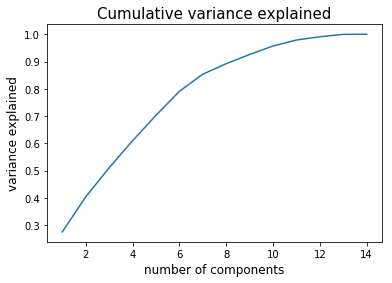

In [17]:
#Plot the variance, cumulated per component
plt.plot(np.linspace(1, scale_df.shape[1], scale_df.shape[1]), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize=12)
plt.ylabel('variance explained', fontsize=12)
plt.title('Cumulative variance explained',fontsize=15)

Text(0.5,1,'Variance explained by each component')

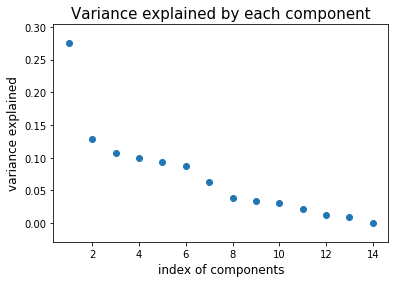

In [18]:
#Plot the 
plt.scatter(range(1, scale_df.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('index of components', fontsize=12)
plt.ylabel('variance explained', fontsize=12)
plt.title('Variance explained by each component',fontsize=15)